In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-automobile-nse-data/stat_arb_data.csv


In [21]:
prices = pd.read_csv("/kaggle/input/indian-automobile-nse-data/stat_arb_data.csv")

In [22]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1239 non-null   object 
 1   ASHOKLEY.NS    1239 non-null   float64
 2   BAJAJ-AUTO.NS  1239 non-null   float64
 3   EICHERMOT.NS   1239 non-null   float64
 4   HEROMOTOCO.NS  1239 non-null   float64
 5   M&M.NS         1239 non-null   float64
 6   MARUTI.NS      1239 non-null   float64
 7   TVSMOTOR.NS    1239 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.6+ KB


In [23]:
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.set_index(prices['Date'])

In [24]:
prices.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-29', '2025-12-30', '2025-12-31',
               '2026-01-01', '2026-01-02'],
              dtype='datetime64[ns]', name='Date', length=1239, freq=None)

In [28]:
prices = prices.drop('Date', axis=1)

In [29]:
import itertools

pairs = list(itertools.combinations(prices.columns, 2))
len(pairs)


21

In [30]:
pairs

[('ASHOKLEY.NS', 'BAJAJ-AUTO.NS'),
 ('ASHOKLEY.NS', 'EICHERMOT.NS'),
 ('ASHOKLEY.NS', 'HEROMOTOCO.NS'),
 ('ASHOKLEY.NS', 'M&M.NS'),
 ('ASHOKLEY.NS', 'MARUTI.NS'),
 ('ASHOKLEY.NS', 'TVSMOTOR.NS'),
 ('BAJAJ-AUTO.NS', 'EICHERMOT.NS'),
 ('BAJAJ-AUTO.NS', 'HEROMOTOCO.NS'),
 ('BAJAJ-AUTO.NS', 'M&M.NS'),
 ('BAJAJ-AUTO.NS', 'MARUTI.NS'),
 ('BAJAJ-AUTO.NS', 'TVSMOTOR.NS'),
 ('EICHERMOT.NS', 'HEROMOTOCO.NS'),
 ('EICHERMOT.NS', 'M&M.NS'),
 ('EICHERMOT.NS', 'MARUTI.NS'),
 ('EICHERMOT.NS', 'TVSMOTOR.NS'),
 ('HEROMOTOCO.NS', 'M&M.NS'),
 ('HEROMOTOCO.NS', 'MARUTI.NS'),
 ('HEROMOTOCO.NS', 'TVSMOTOR.NS'),
 ('M&M.NS', 'MARUTI.NS'),
 ('M&M.NS', 'TVSMOTOR.NS'),
 ('MARUTI.NS', 'TVSMOTOR.NS')]

# Trying with one Pair

In [31]:
pair = ['ASHOKLEY.NS', 'BAJAJ-AUTO.NS']

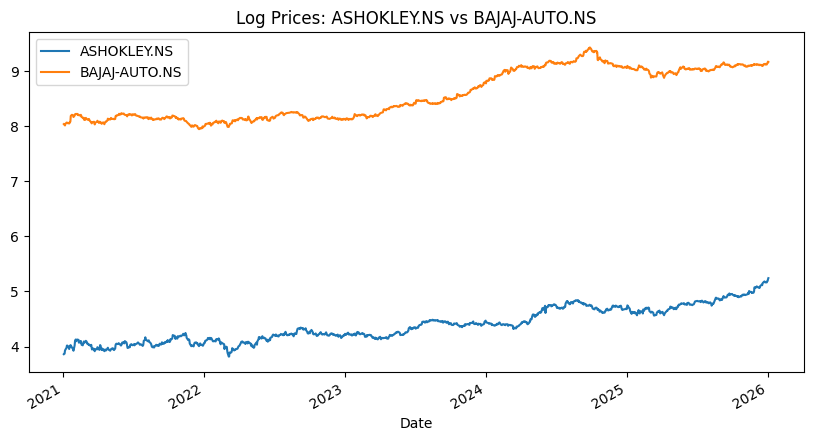

In [34]:
import matplotlib.pyplot as plt

prices[[pair[0], pair[1]]].plot(figsize=(10,5))
plt.title(f'Log Prices: {pair[0]} vs {pair[1]}')
plt.show()

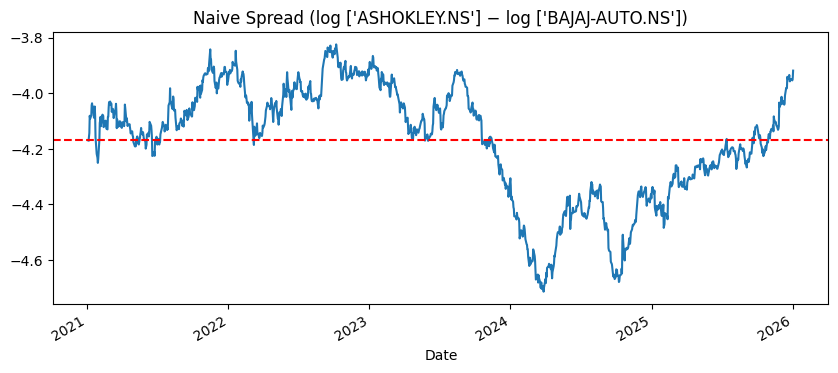

In [36]:
#Using Naive Hedge ratio of 1
spread = prices[pair[0]] - prices[pair[1]]

spread.plot(figsize=(10,4))
plt.title(f'Naive Spread (log {[pair[0]]} − log {[pair[1]]})')
plt.axhline(spread.mean(), color='red', linestyle='--')
plt.show()

## Engle-Granger Test

In [37]:
from statsmodels.tsa.stattools import coint

score, pvalue, crit_vals = coint(
    prices[pair[0]],
    prices[pair[1]]
)

print("Test statistic:", score)
print("p-value:", pvalue)
print("Critical values:", crit_vals)

Test statistic: -1.3784901290146738
p-value: 0.8047910757917331
Critical values: [-3.90530832 -3.34106991 -3.04787762]


Yay!! p-value>0.05; not cointegrated

## Extraction of Hedge Ratio (beta)

In [38]:
import statsmodels.api as sm

X = sm.add_constant(prices[pair[1]])
model = sm.OLS(prices[pair[0]], X).fit()

beta = model.params[pair[1]]
alpha = model.params['const']

print("Hedge ratio (beta):", beta)

Hedge ratio (beta): 0.6374571390506258


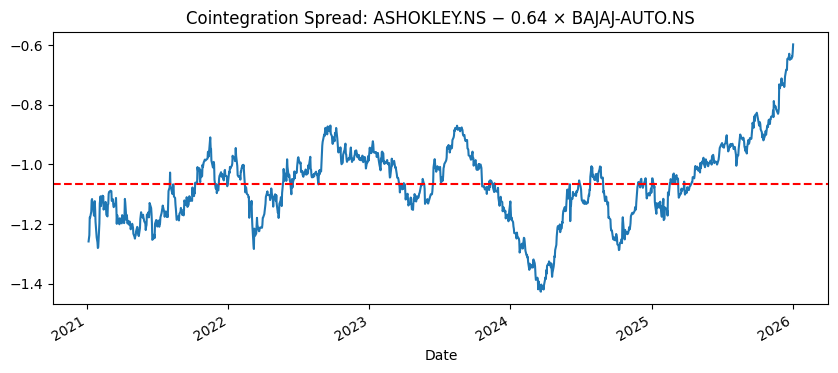

In [39]:
#Constructing proper spread

spread = prices[pair[0]] - beta * prices[pair[1]]

spread.plot(figsize=(10,4))
plt.axhline(spread.mean(), color='red', linestyle='--')
plt.title(f'Cointegration Spread: {pair[0]} − {beta:.2f} × {pair[1]}')
plt.show()